In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [96]:
data = pd.read_csv('Car.csv')
data.head(1)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc


#### data['buying'],_ = pd.factorize(data['buying'])
#### -> data['buying'] = np.where(data['buying'] == 'low', 0, np.where(data['buying'] == 'med', 1, np.where(data['buying'] == 'high', 2, 3)))

In [97]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data['class'],_ = pd.factorize(data['class'])

In [62]:
# data['buying'] = np.where(data['buying'] == 'low', 0, np.where(data['buying'] == 'med', 1, np.where(data['buying'] == 'high', 2, 3)))
# #data['buying'],_ = pd.factorize(data['buying'])
# data['maint'] = np.where(data['maint'] == 'low', 0, np.where(data['maint'] == 'med', 1, np.where(data['maint'] == 'high', 2, 3)))
# data['doors'] = np.where(data['doors'] == "5more", 5,data['doors'])
# data['persons'] = np.where(data['persons'] == 'more', 5,data['doors'])
# data['safety'] = np.where(data['safety'] == 'low', 0, np.where(data['safety'] == 'med', 1, 2))
# data['lug_boot'] = np.where(data['lug_boot'] == 'small', 0, np.where(data['lug_boot'] == 'med', 1, 2))

In [59]:
# data['class'],_ = pd.factorize(data['class'])
data


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,unacc
1,3,3,2,2,0,1,unacc
2,3,3,2,2,0,2,unacc
3,3,3,2,2,1,0,unacc
4,3,3,2,2,1,1,unacc
5,3,3,2,2,1,2,unacc
6,3,3,2,2,2,0,unacc
7,3,3,2,2,2,1,unacc
8,3,3,2,2,2,2,unacc
9,3,3,2,2,0,0,unacc


In [98]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values.reshape(-1,1)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3, random_state = 0)


dstClf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
#dstClf = DecisionTreeClassifier()
dstClf.fit(xtrain,ytrain)

Result = dstClf.predict(xtest)
metrics.accuracy_score(ytest,Result)


0.815028901734104

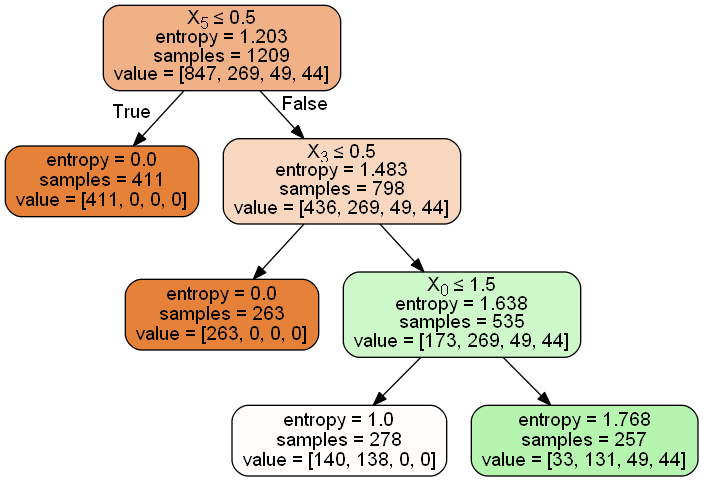

In [99]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

import io
import os
os.environ["PATH"] += os.pathsep + 'C://Program Files (x86)//Graphviz2.38//bin'

dot_data = io.StringIO()
dot_data = io.StringIO()
export_graphviz(dstClf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [22]:
#!pip install graphviz
#!pip install pydotplus